In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs
import numpy as np
import statistics

from matplotlib.pyplot import figure

## Objetivo da Análise
- Explorar os elementos do Banco de Dados;
- Determinar possíveis padrões entre os dados, de forma a otimizar combos e speedruns <br>
de jogos de Pokémon que contemplem os pokémon presentes no Banco (até a sétima geração);
- Ilustrar tudo isso com tabelas e gráficos lindes e perfeites;

In [3]:
pokemon_db = pd.read_csv('pokemon.csv')

In [4]:
pokemon_db.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [5]:
pokemon_db.tail()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1
800,['Soul-Heart'],0.25,0.5,0.0,1.0,0.5,1.0,2.0,0.5,1.0,...,NaN,801,130,115,65,steel,fairy,80.5,7,1


In [6]:
print("Shape: ", pokemon_db.shape)
print("\n Colunas: ", pokemon_db.columns)
print("\n Length: ", len(pokemon_db))

Shape:  (801, 41)

 Colunas:  Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

 Length:  801


array([[<Axes: title={'center': 'generation'}>]], dtype=object)

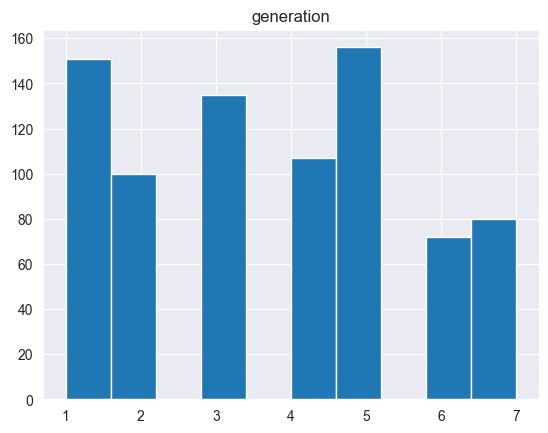

In [7]:
pokemon_db.hist('generation')

In [8]:
tipos = list(set(pokemon_db.type1))
print(tipos)

['normal', 'psychic', 'fighting', 'dark', 'electric', 'ground', 'rock', 'bug', 'poison', 'ice', 'grass', 'fairy', 'flying', 'ghost', 'dragon', 'water', 'fire', 'steel']


In [9]:
nomes = sorted(pokemon_db.name)
print(nomes)

['Abomasnow', 'Abra', 'Absol', 'Accelgor', 'Aegislash', 'Aerodactyl', 'Aggron', 'Aipom', 'Alakazam', 'Alomomola', 'Altaria', 'Amaura', 'Ambipom', 'Amoonguss', 'Ampharos', 'Anorith', 'Araquanid', 'Arbok', 'Arcanine', 'Arceus', 'Archen', 'Archeops', 'Ariados', 'Armaldo', 'Aromatisse', 'Aron', 'Articuno', 'Audino', 'Aurorus', 'Avalugg', 'Axew', 'Azelf', 'Azumarill', 'Azurill', 'Bagon', 'Baltoy', 'Banette', 'Barbaracle', 'Barboach', 'Basculin', 'Bastiodon', 'Bayleef', 'Beartic', 'Beautifly', 'Beedrill', 'Beheeyem', 'Beldum', 'Bellossom', 'Bellsprout', 'Bergmite', 'Bewear', 'Bibarel', 'Bidoof', 'Binacle', 'Bisharp', 'Blastoise', 'Blaziken', 'Blissey', 'Blitzle', 'Boldore', 'Bonsly', 'Bouffalant', 'Bounsweet', 'Braixen', 'Braviary', 'Breloom', 'Brionne', 'Bronzong', 'Bronzor', 'Bruxish', 'Budew', 'Buizel', 'Bulbasaur', 'Buneary', 'Bunnelby', 'Burmy', 'Butterfree', 'Buzzwole', 'Cacnea', 'Cacturne', 'Camerupt', 'Carbink', 'Carnivine', 'Carracosta', 'Carvanha', 'Cascoon', 'Castform', 'Caterpie'

In [10]:
felicidade_media = {}
pokemon_por_tipo = {}
tipos_brutos = pokemon_db.type1

for tipo in tipos:
    lista_tipo_atual = []
    for nome in nomes:
        if tipos_brutos[nomes.index(nome)] == tipo:
            lista_tipo_atual.append(nome)
            
    pokemon_por_tipo[tipo] = lista_tipo_atual

In [27]:
for tipo, pokemon in pokemon_por_tipo.items():
    soma_felicidade_tipo = []
    print(tipo)
    for poke in pokemon:
        soma_felicidade_tipo.append(pokemon_db['base_happiness'][nomes.index(poke)])
    
    felicidade_media[tipo] = statistics.mean(soma_felicidade_tipo)
    print(felicidade_media)

normal
{'normal': 69}
psychic
{'normal': 69, 'psychic': 63}
fighting
{'normal': 69, 'psychic': 63, 'fighting': 70}
dark
{'normal': 69, 'psychic': 63, 'fighting': 70, 'dark': 42}
electric
{'normal': 69, 'psychic': 63, 'fighting': 70, 'dark': 42, 'electric': 68}
ground
{'normal': 69, 'psychic': 63, 'fighting': 70, 'dark': 42, 'electric': 68, 'ground': 68}
rock
{'normal': 69, 'psychic': 63, 'fighting': 70, 'dark': 42, 'electric': 68, 'ground': 68, 'rock': 64}
bug
{'normal': 69, 'psychic': 63, 'fighting': 70, 'dark': 42, 'electric': 68, 'ground': 68, 'rock': 64, 'bug': 67}
poison
{'normal': 69, 'psychic': 63, 'fighting': 70, 'dark': 42, 'electric': 68, 'ground': 68, 'rock': 64, 'bug': 67, 'poison': 70}
ice
{'normal': 69, 'psychic': 63, 'fighting': 70, 'dark': 42, 'electric': 68, 'ground': 68, 'rock': 64, 'bug': 67, 'poison': 70, 'ice': 65}
grass
{'normal': 69, 'psychic': 63, 'fighting': 70, 'dark': 42, 'electric': 68, 'ground': 68, 'rock': 64, 'bug': 67, 'poison': 70, 'ice': 65, 'grass': 6

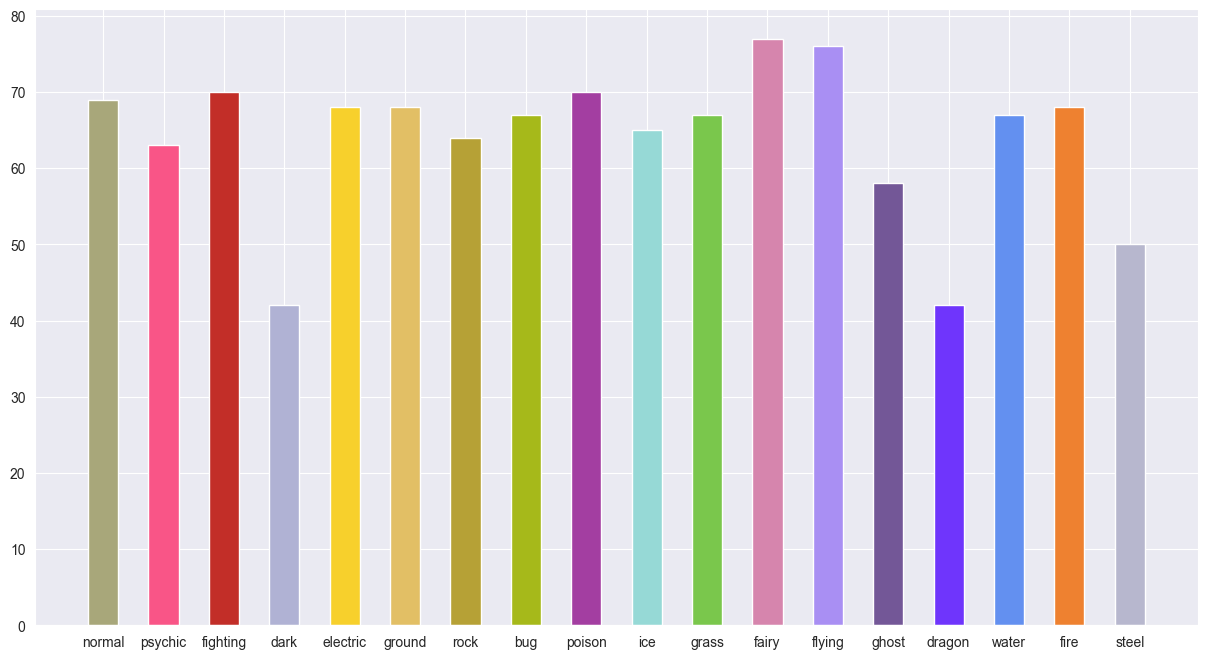

In [72]:
felicidades = list(felicidade_media.values())
cores = ['#A8A77A', '#F95587', '#C22E28', '#B0B2D4', '#F7D02C', '#E2BF65', '#B6A136', '#A6B91A', '#A33EA1', '#96D9D6', '#7AC74C', '#D685AD', '#A98FF3', '#735797', '#6F35FC', '#6390F0', '#EE8130', '#B7B7CE']

fig = plt.figure(figsize = (15, 8))
plt.bar(tipos, felicidades, width = 0.5, color=cores)
plt.show()